### Declaramos las librerías

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

### Abrimos los datos

In [2]:
TFile *file = TFile::Open("Tracks_Clusters.root"); 

### Leemos los datos y los ponemos en arbolitos

In [3]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................


<p>The next step is to extract the varibles we want from the dataset. We will explore two jet types: "Reco" (reconstructed from the calorimeter) and "Truth"(particle level). Activate "Event Weight". 

### Creamos un Canvas

In [4]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

### Vamos a extraer la información de cada variable y le reescribiremos 

In [5]:
float evtw = -1;
vector<float> *reco_R4_pt;
vector<float> *truth_R4_pt;

tree->SetBranchAddress("EventWeight", &evtw);
tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);

# Parte 1 #
Hacer el histograma de:

**Truth Jets** con **Mayor pT**  y solo los **Truth Jets**, todo Con y sin *Event weights* \
**Reco Jets** con **mayor pT**   y solo los **Reco Jets**, todo  Con y sin *Event weights* \

Para luego compararlos 

Lead_A vs A con y sin pesos\
Lead_A vs Lead_B vs Lead_C con y sin pesos


*Aqui creo los histogramas para Lead_Reco, Lead_Truth, Lead_Track y Reco, Truth, Track* **Estos histogramas van a incluir los pesos**

In [6]:
TH1F *hist_leadreco_pt = new TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_reco_pt = new TH1F("Reco-jet","Jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruth_pt = new TH1F("Lead Truth-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_truth_pt = new TH1F("Truth-jet","Jet pT; pT(GeV);Events",50,10,200);

*Aqui lleno los histogramas para cada uno con los pesos*

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.,evtw);  
    for(int j=0; j<reco_R4_pt->size(); j++){
        hist_reco_pt->Fill(reco_R4_pt->at(j)/1000.,evtw);     
    }
    }
    if(truth_R4_pt->size()>0){
    hist_leadtruth_pt->Fill(truth_R4_pt->at(0)/1000.,evtw);  
    for(int j=0; j<truth_R4_pt->size(); j++){
        hist_truth_pt->Fill(truth_R4_pt->at(j)/1000.,evtw);     
    }
    }
    }

std::cout << "Done!" << std::endl;

Done!


## Dibujamos los Histogramas de "Lead Reco" y "Reco" ##

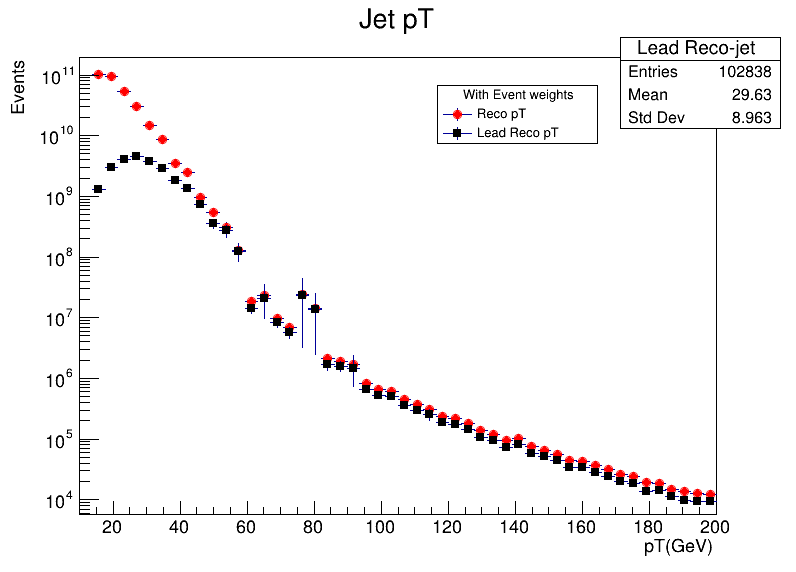

In [9]:
hist_reco_pt->SetMarkerStyle(20);
hist_reco_pt->SetMarkerColor(kRed);
hist_reco_pt->Draw();
hist_leadreco_pt->SetMarkerStyle(21);
hist_leadreco_pt->Draw("SAMES");
auto legend = new TLegend(0.75,0.85,0.55,0.75);
   legend->SetHeader("With Event weights","C"); // option "C" allows to center the header
   legend->AddEntry(hist_reco_pt,"Reco pT","lep");
   legend->AddEntry(hist_leadreco_pt,"Lead Reco pT","lep");
   legend->Draw();
 
canvas->SetLogy();
canvas->Draw();

## Dibujamos los Histogramas de "Lead Truth" y "Truth" Jets ##

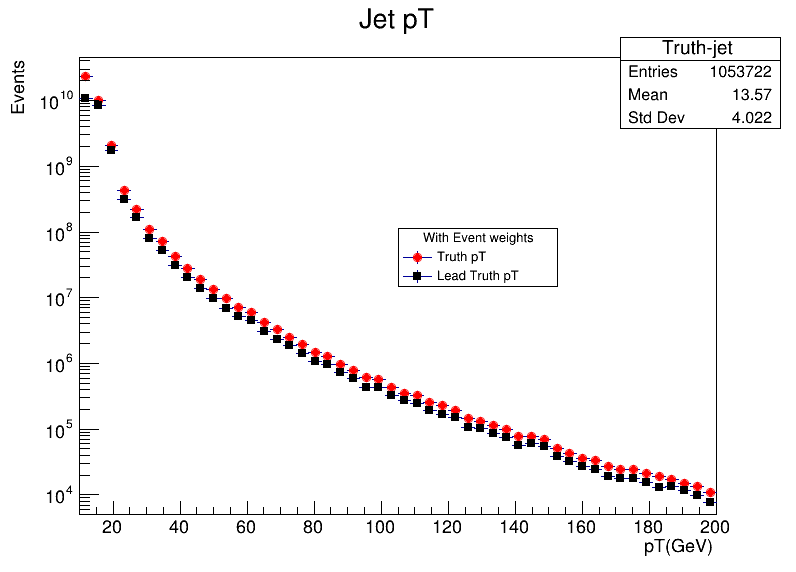

In [10]:
hist_truth_pt->SetMarkerStyle(20);
hist_truth_pt->SetMarkerColor(kRed);
hist_truth_pt->Draw("");
hist_leadtruth_pt->SetMarkerStyle(21);
hist_leadtruth_pt->Draw("same");
auto legend = new TLegend(0.7,0.5,0.5,0.6);
   legend->SetHeader("With Event weights","C"); // option "C" allows to center the header
   legend->AddEntry(hist_truth_pt,"Truth pT","lep");
   legend->AddEntry(hist_leadtruth_pt,"Lead Truth pT","lep");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();

### Ahora todos los Leads juntos 

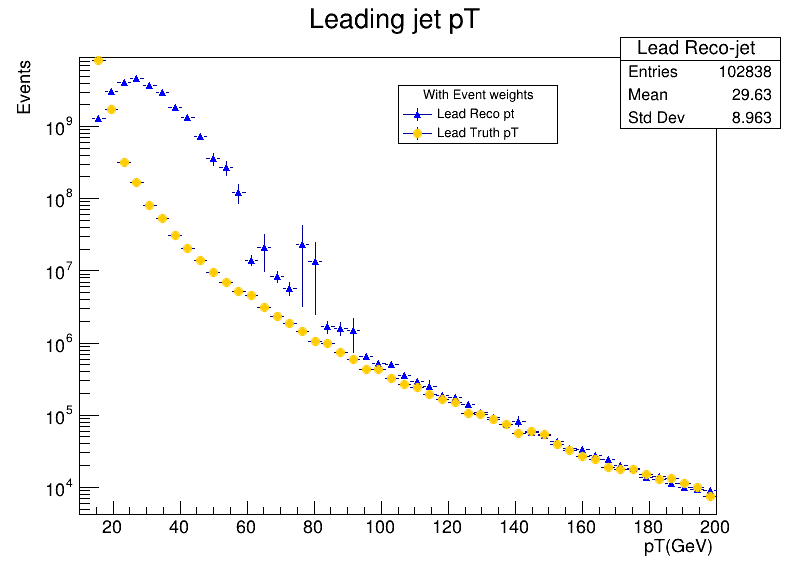

In [11]:
hist_leadreco_pt->SetMarkerStyle(22);
hist_leadreco_pt->SetMarkerColor(kBlue);
hist_leadreco_pt->Draw("");
hist_leadtruth_pt->SetMarkerStyle(20);
hist_leadtruth_pt->SetMarkerColor(kOrange);
hist_leadtruth_pt->Draw("same");

auto legend = new TLegend(0.7,0.75,0.5,0.85);
   legend->SetHeader("With Event weights","C"); // option "C" allows to center the header
   legend->AddEntry(hist_leadreco_pt,"Lead Reco pt","lep") ;
   legend->AddEntry(hist_leadtruth_pt,"Lead Truth pT","lep");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();

## Vamos a crear los Histogramas para los Lead Reco, LeadTruth Jets y los Reco, Truth  Jets sin los pesos

In [12]:
TH1F *hist_leadreco_pt_wo = new TH1F("Lead Reco-jet without rescaling","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_reco_pt_wo = new TH1F("Reco-jet without rescaling","Jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruth_pt_wo = new TH1F("Lead Truth-jet without rescaling","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_truth_pt_wo = new TH1F("Truth-jet without rescaling","Jet pT; pT(GeV);Events",50,10,200);

### Reco

In [13]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{

    nbytes = tree->GetEntry(i);
    hist_reco_pt_wo->Fill(reco_R4_pt->size());  
    if(reco_R4_pt->size()>0)
    {
        hist_leadreco_pt_wo->Fill(reco_R4_pt->at(0)/1000);
    }
    
    
}


std::cout << "Done!" << std::endl;

Done!


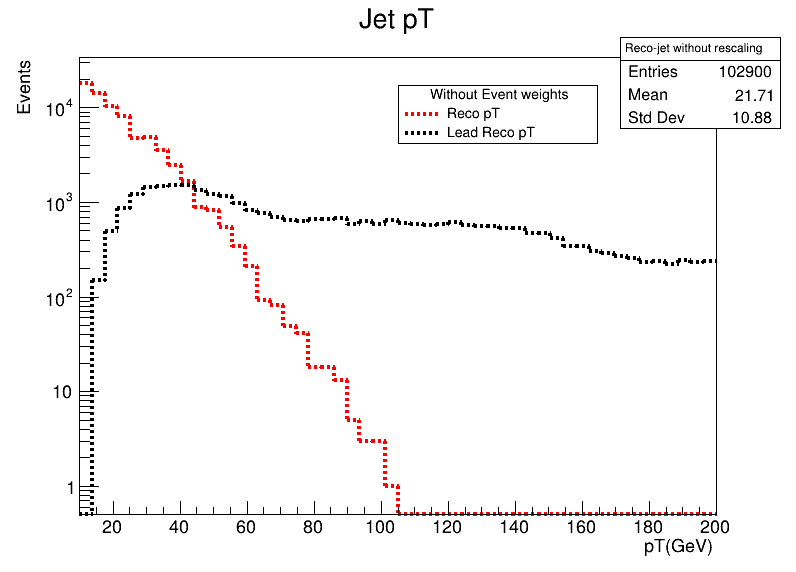

In [14]:
hist_reco_pt_wo->SetLineWidth(4);
hist_reco_pt_wo->SetLineStyle(2);
hist_reco_pt_wo->SetLineColor(kRed);
hist_reco_pt_wo->Draw("");
hist_leadreco_pt_wo->SetLineWidth(4);
hist_leadreco_pt_wo->SetLineStyle(2);
hist_leadreco_pt_wo->SetLineColor(kBlack);
hist_leadreco_pt_wo->Draw("same");
auto legend = new TLegend(0.75,0.85,0.5,0.75);
   legend->SetBorderSize(1); 
   legend->SetHeader("Without Event weights","C"); // option "C" allows to center the header
   legend->AddEntry(hist_reco_pt_wo,"Reco pT","l");
   legend->AddEntry(hist_leadreco_pt_wo,"Lead Reco pT","l");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();

### Truth

In [15]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_truth_pt_wo->Fill(truth_R4_pt->size());  
    if(truth_R4_pt->size()>0)
    {
        hist_leadtruth_pt_wo->Fill(truth_R4_pt->at(0)/1000);
    }
}


std::cout << "Done!" << std::endl;

Done!


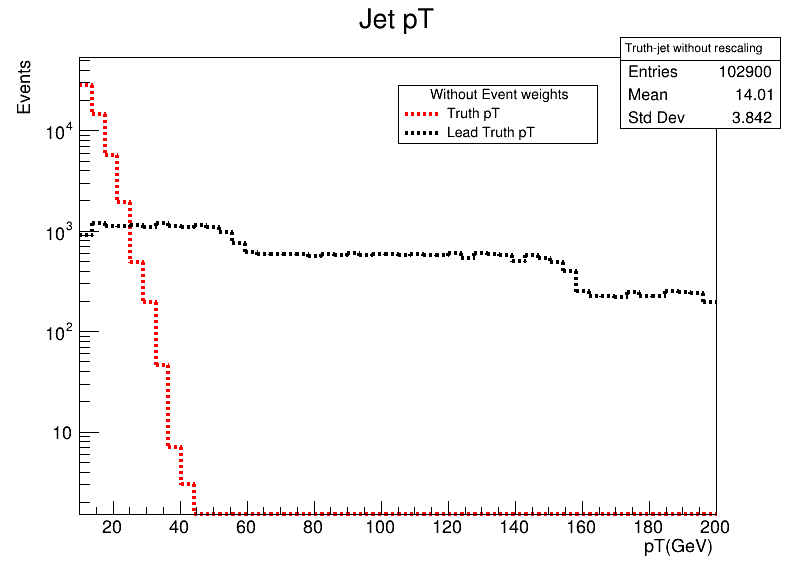

In [16]:
hist_truth_pt_wo->SetLineWidth(4);
hist_truth_pt_wo->SetLineStyle(2);
hist_truth_pt_wo->SetLineColor(kRed);
hist_truth_pt_wo->Draw("");
hist_leadtruth_pt_wo->SetLineWidth(4);
hist_leadtruth_pt_wo->SetLineStyle(2);
hist_leadtruth_pt_wo->SetLineColor(kBlack);
hist_leadtruth_pt_wo->Draw("same");
auto legend = new TLegend(0.75,0.85,0.5,0.75);
   legend->SetBorderSize(1); 
   legend->SetHeader("Without Event weights","C"); // option "C" allows to center the header
   legend->AddEntry(hist_truth_pt_wo,"Truth pT","l");
   legend->AddEntry(hist_leadtruth_pt_wo,"Lead Truth pT","l");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();

### Ahora todos los Leads juntos

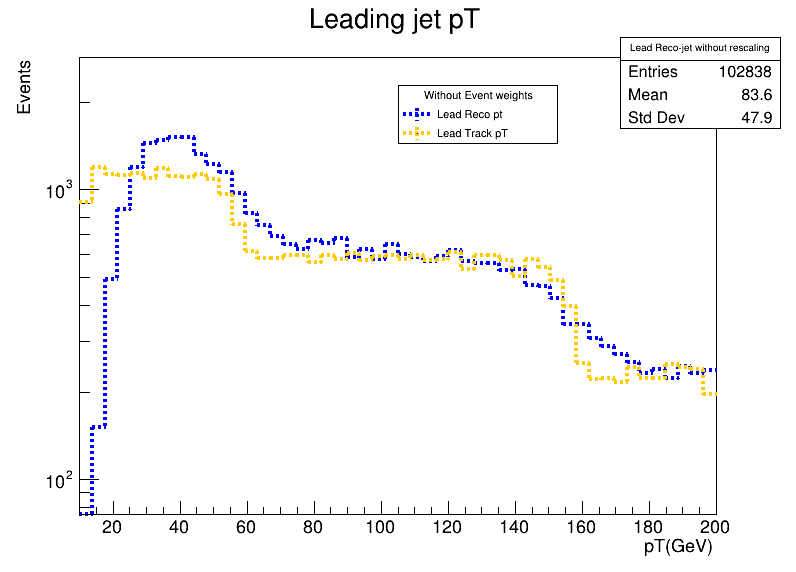

In [18]:
hist_leadreco_pt_wo->SetLineWidth(4);
hist_leadreco_pt_wo->SetLineStyle(2);
hist_leadreco_pt_wo->SetLineColor(kBlue);
hist_leadreco_pt_wo->Draw("");
hist_leadtruth_pt_wo->SetLineWidth(4);
hist_leadtruth_pt_wo->SetLineStyle(2);
hist_leadtruth_pt_wo->SetLineColor(kOrange);
hist_leadtruth_pt_wo->Draw("same");

auto legend = new TLegend(0.7,0.75,0.5,0.85);
   legend->SetHeader("Without Event weights","C"); // option "C" allows to center the header
   legend->AddEntry(hist_leadreco_pt_wo,"Lead Reco pt","lep");
   legend->AddEntry(hist_leadtruth_pt_wo,"Lead Track pT","lep");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();

# Parte 2

Graficos de **Reco** y **Truth jets pt** vs **Pileup**.
Los resultados se discuten en el README

Now we will study the jets pileup dependence 

In [6]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

float mu = -1;
tree->SetBranchAddress("mu_average", &mu);

Plot jet pt vs. pileup

In [7]:
TH2F *hist_rjetpt_npv = new TH2F("Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
TProfile *prof_rjetpt_npv = new TProfile("Profile Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 0, 200);
TH2F *hist_tjetpt_npv = new TH2F("Truth-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
TProfile *prof_tjetpt_npv = new TProfile("Profile Truth-jet pT vs. NPV",";NPV; jet pT",50,1,50, 0, 200);

Fill the histograms: Make a cut to accept events with at least one jet and require the leading jet to have pT above 20 GeV

In [8]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        for(int j=0; j<reco_R4_pt->size(); j++){
        hist_rjetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        prof_rjetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        }
    }
}

std::cout << "Done!" << std::endl;

Done!


In [10]:
TCanvas *canvas2 = new TCanvas("Canvas2","",800,600);

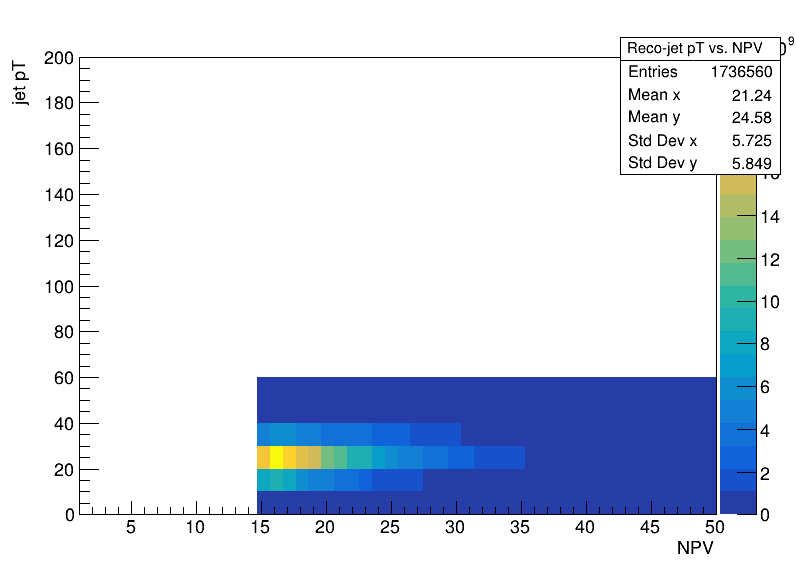

In [10]:
hist_rjetpt_npv->Draw("colz");
canvas2->Draw();

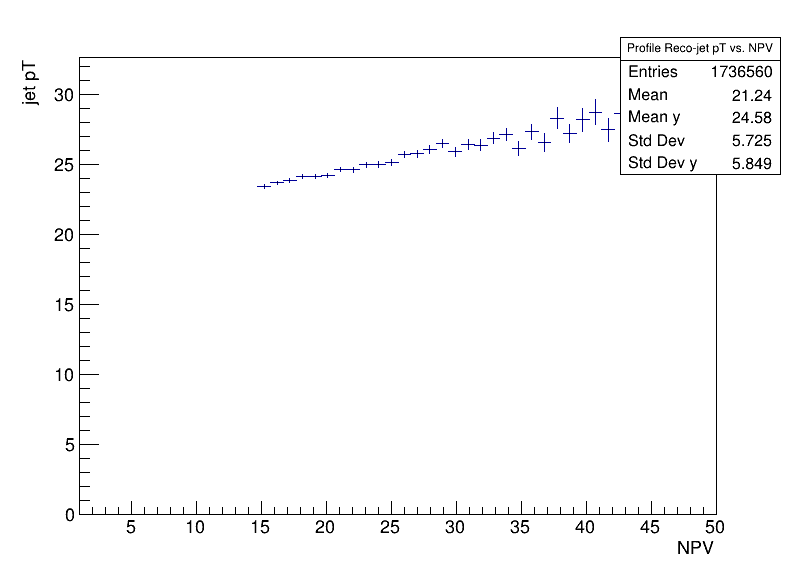

In [11]:
prof_rjetpt_npv->Draw("");
canvas2->Draw();

In [12]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        for(int j=0; j<truth_R4_pt->size(); j++){
        hist_tjetpt_npv->Fill(truth_R4_pt->at(j)/1000.,npv,evtw);
        prof_tjetpt_npv->Fill(truth_R4_pt->at(j)/1000.,npv,evtw);
        }
    }
}

std::cout << "Done!" << std::endl;

Done!


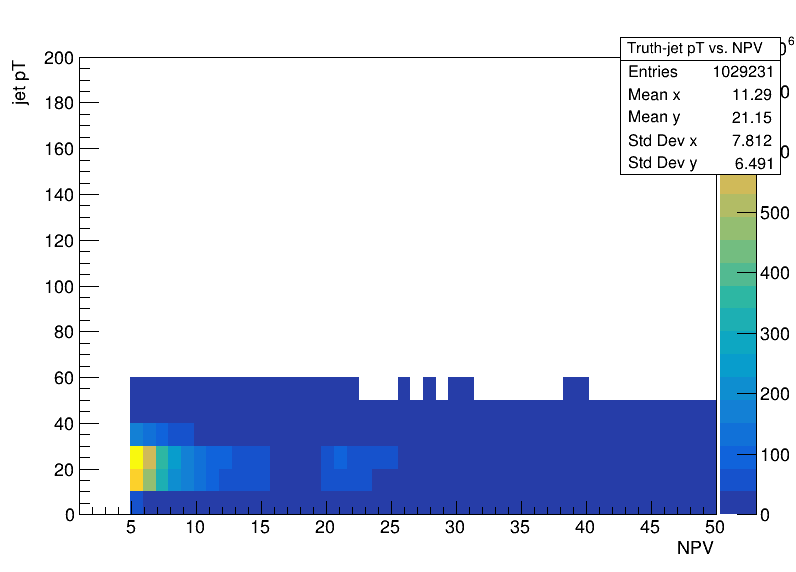

In [13]:
hist_tjetpt_npv->Draw("colz");
canvas2->Draw();

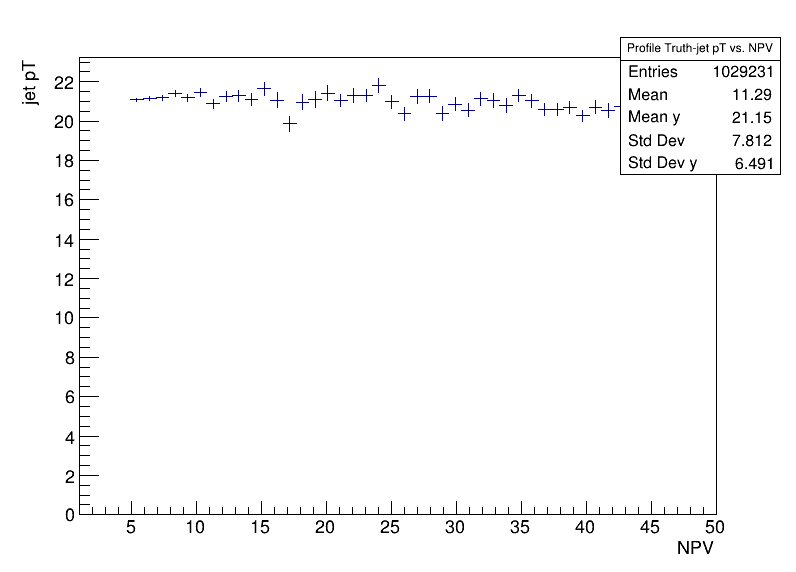

In [14]:
prof_tjetpt_npv->Draw("");
canvas2->Draw();

In [15]:
TH2F *hist_rjetpt_mu = new TH2F("Reco-jet pT vs. mu average",";mu average; jet pT",50,1,50, 20, 0, 200);
TProfile *prof_rjetpt_mu = new TProfile("Profile Reco-jet pT vs. mu average",";NPV; jet pT",50,1,50, 0, 200);
TH2F *hist_tjetpt_mu = new TH2F("Truth-jet pT vs. mu average",";mu average; jet pT",50,1,50, 20, 0, 200);
TProfile *prof_tjetpt_mu = new TProfile("Profile Truth-jet pT vs. mu avverage",";mu average; jet pT",50,1,50, 0, 200);

In [17]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        for(int j=0; j<reco_R4_pt->size(); j++){
        hist_rjetpt_mu->Fill(reco_R4_pt->at(j)/1000.,mu,evtw);
        prof_rjetpt_mu->Fill(reco_R4_pt->at(j)/1000.,mu,evtw);
        }
    }
}

std::cout << "Done!" << std::endl;

Done!


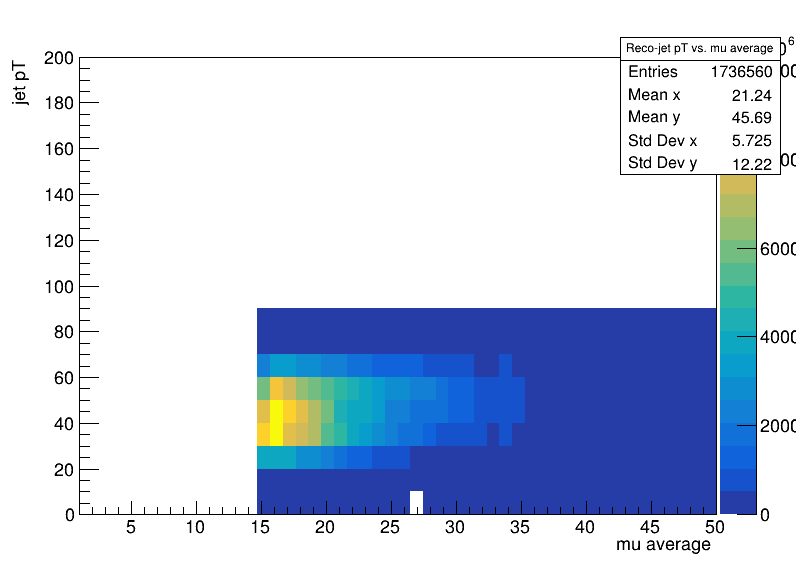

In [18]:
hist_rjetpt_mu->Draw("colz");
canvas2->Draw();

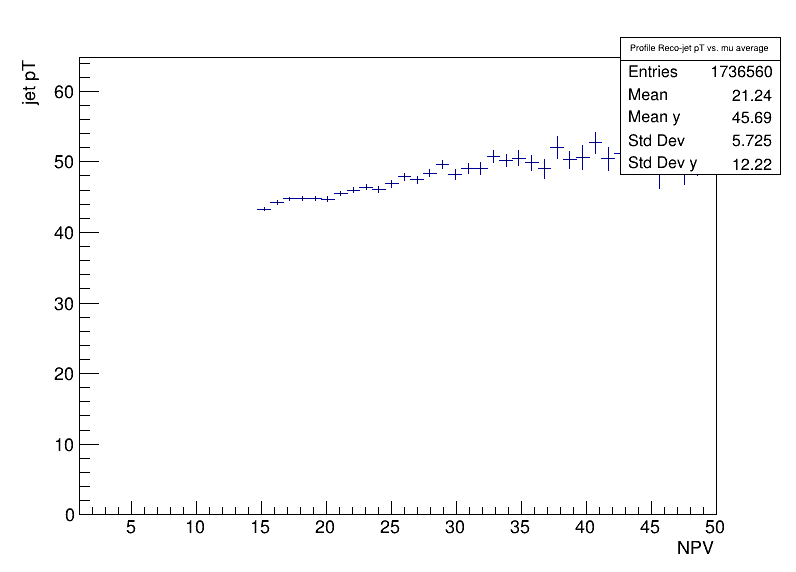

In [19]:
prof_rjetpt_mu->Draw("");
canvas2->Draw();

In [20]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        for(int j=0; j<truth_R4_pt->size(); j++){
        hist_tjetpt_mu->Fill(truth_R4_pt->at(j)/1000.,mu,evtw);
        prof_tjetpt_mu->Fill(truth_R4_pt->at(j)/1000.,mu,evtw);
        }
    }
}

std::cout << "Done!" << std::endl;

Done!


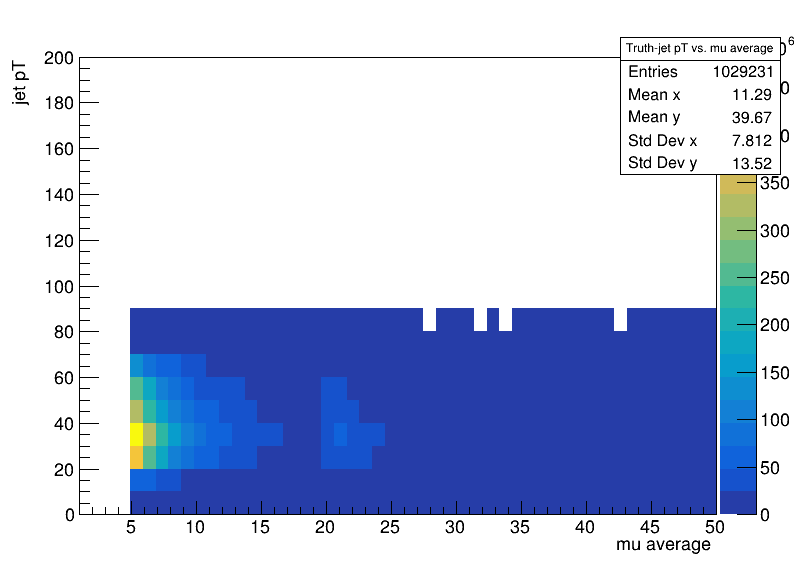

In [21]:
hist_tjetpt_mu->Draw("colz");
canvas2->Draw();

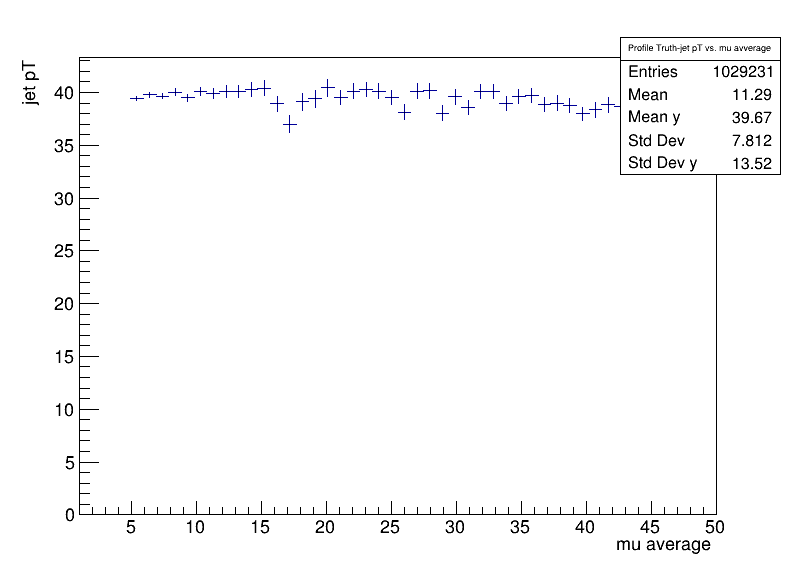

In [23]:
prof_tjetpt_mu->Draw("");
canvas2->Draw();

<b>Excercise: 
3. Make plots for reco and truth jet pT vs. pileup. Interpret your results. 
</b>

Plot the JVF (Jet Vertex Fraction) variable

In [11]:
vector<float> *reco_R4_jvf;

tree->SetBranchAddress("RecoJets_R4_jvf", &reco_R4_jvf);

In [12]:
TH1F *hist_leadreco_jvf = new TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);
TH1F *hist_leadreco100_jvf = new TH1F("Lead Reco-jet JVF 100","Leading jet JVF; JVF;Events",20,-1,1);


In [13]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        hist_leadreco_jvf->Fill(reco_R4_jvf->at(0), evtw);
        if(reco_R4_pt->at(0)>100000.){hist_leadreco100_jvf->Fill(reco_R4_jvf->at(0), evtw);}
       
        
    }
}

std::cout << "Done!" << std::endl;

Done!


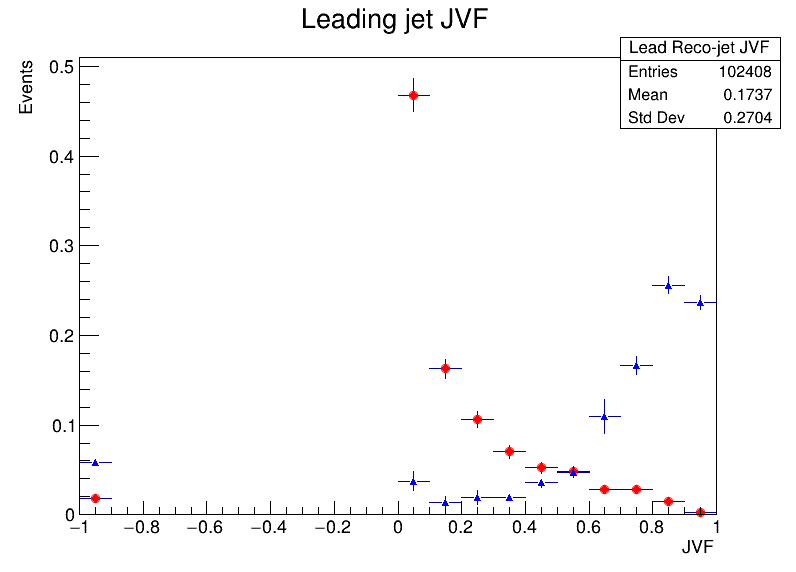

In [14]:
hist_leadreco_jvf->SetMarkerStyle(20);
hist_leadreco_jvf->SetMarkerColor(kRed);
hist_leadreco_jvf->DrawNormalized("");
hist_leadreco100_jvf->SetMarkerStyle(22);
hist_leadreco100_jvf->SetMarkerColor(kBlue);
hist_leadreco100_jvf->DrawNormalized("same");
canvas2->Draw();

In [15]:
TH1F *hist_leadreco_jvf_wo = new TH1F("Lead Reco-jet JVF evtwo","Leading jet JVF; JVF;Events",20,-1,1);
TH1F *hist_leadreco100_jvf_wo = new TH1F("Lead Reco-jet JVF 100 evtwo","Leading jet JVF; JVF;Events",20,-1,1);


In [16]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        hist_leadreco_jvf_wo->Fill(reco_R4_jvf->at(0));
        if(reco_R4_pt->at(0)>100000.){hist_leadreco100_jvf_wo->Fill(reco_R4_jvf->at(0));}
       
        
    }
}

std::cout << "Done!" << std::endl;

Done!


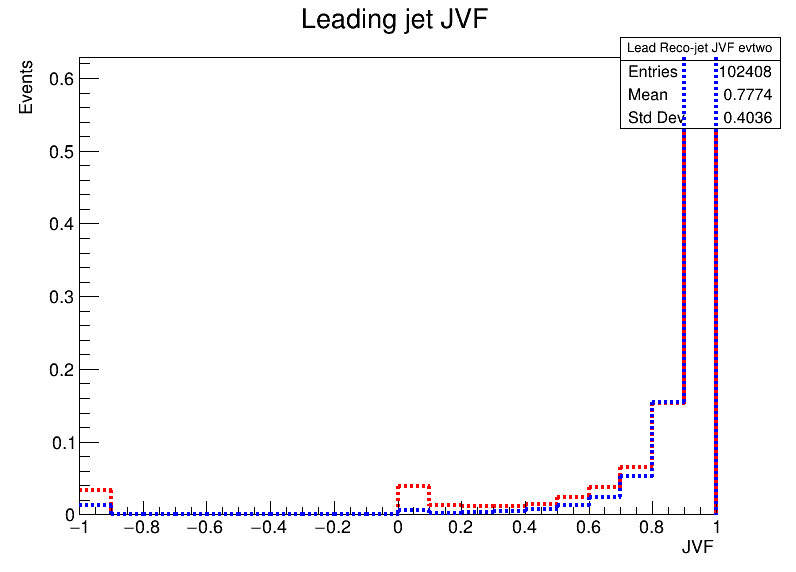

In [17]:
hist_leadreco_jvf_wo->SetLineWidth(4);
hist_leadreco_jvf_wo->SetLineStyle(2);
hist_leadreco_jvf_wo->SetLineColor(kRed);
hist_leadreco_jvf_wo->DrawNormalized("");
hist_leadreco100_jvf_wo->SetLineWidth(4);
hist_leadreco100_jvf_wo->SetLineStyle(2);
hist_leadreco100_jvf_wo->SetLineColor(kBlue);
hist_leadreco100_jvf_wo->DrawNormalized("same");

canvas2->Draw();

In [21]:
TH1F *hist_leadreco_jvf5 = new TH1F("Lead Reco-jet |JVF|<0.5","Leading jet JVF; JVF;Events",20,-1,1);
TH1F *hist_leadreco100_jvf5 = new TH1F("Lead Reco-jet |JVF|<0.5 100","Leading jet JVF; JVF;Events",20,-1,1);

In [ ]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    
    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        hist_leadreco_jvf->Fill(reco_R4_jvf->at(0), evtw);
        if(reco_R4_pt->at(0)>100000.){hist_leadreco100_jvf->Fill(reco_R4_jvf->at(0), evtw);}
       
        
    }
}

std::cout << "Done!" << std::endl;

<b>Excercise: 
4. Use a |JVF|>0.5 cut to compare the leading jet pT for truth jets, reco jets (w.o. the cut), and reco jets (with the cut) 
5. Repeat the same plots and comparisons with "Track-jets" and verify that they are stable against pileup 
</b>

Now we will study the jet response: the ratio between the pT of the jet to the truth jet. First we should "match" the jets and the truth jets. We will use the distance DeltaR between the two, but first we should define them as four-vectors:

In [18]:
vector<float> *reco_R4_eta;
vector<float> *reco_R4_phi;
vector<float> *reco_R4_m;

vector<float> *truth_R4_eta;
vector<float> *truth_R4_phi;
vector<float> *truth_R4_m;

tree->SetBranchAddress("RecoJets_R4_eta", &reco_R4_eta);
tree->SetBranchAddress("RecoJets_R4_phi", &reco_R4_phi);
tree->SetBranchAddress("RecoJets_R4_m", &reco_R4_m);
tree->SetBranchAddress("TruthJets_R4_eta", &truth_R4_eta);
tree->SetBranchAddress("TruthJets_R4_phi", &truth_R4_phi);
tree->SetBranchAddress("TruthJets_R4_m", &truth_R4_m);

In [19]:
TH1F *hist_DR_reco_truth = new TH1F("Delta R reco","Delta R; #Delta R; Events",20,0,2);

In [20]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
 
        //Plot the Delta R
        hist_DR_reco_truth->Fill(truthJet.DeltaR(recoJet),evtw);
    }
    }
}

std::cout << "Done!" << std::endl;


Done!


In [ ]:
hist_DR_reco_truth->Scale(1/hist_DR_reco_truth->Integral());
hist_DR_reco_truth->DrawNormalized("");
canvas2->Draw();

<b>Excercise: 
6. Repeat for track-jets and make a plot comparing three cases: reco-jets with and without the JVF cut, and track-jets 
</b>

<b>Excercises: 
7. Plot the response: For matched jets (use DeltaR<0.3), plot pTjet/pTtruth for 3 cases: truth_pT>20 GeV, 100 GeV, 500 GeV. Do this for track jets and reco jets (two plots).
8. Investigate the Large-R jets: 
    (a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets
    (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets
    (c) Compare all plots. How can you explain the differences?
    (d) Make the same comparisson for the jet mass.  

</b>